# Project Title: Real-Time Fraud Detection in Banking
**Objective: To develop a real-time fraud detection system that identifies suspicious transactions by analyzing patterns in banking data.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Fraud detection Dataset.csv')

In [3]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'transaction_time', 'location', 'is_foreign_transaction', 'device_type',
       'is_new_device', 'is_new_location', 'account_age_days',
       'avg_transaction_amount', 'transactions_last_24h', 'failed_logins_24h',
       'time_since_last_txn', 'txn_hour', 'is_weekend', 'is_fraud'],
      dtype='object')

In [4]:
df.shape

(100186, 18)

In [5]:
df.isnull().sum()

transaction_id            0
user_id                   0
transaction_amount        0
transaction_type          0
transaction_time          0
location                  0
is_foreign_transaction    0
device_type               0
is_new_device             0
is_new_location           0
account_age_days          0
avg_transaction_amount    0
transactions_last_24h     0
failed_logins_24h         0
time_since_last_txn       0
txn_hour                  0
is_weekend                0
is_fraud                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

transaction_id             object
user_id                    object
transaction_amount        float64
transaction_type           object
transaction_time           object
location                   object
is_foreign_transaction      int64
device_type                object
is_new_device               int64
is_new_location             int64
account_age_days            int64
avg_transaction_amount    float64
transactions_last_24h       int64
failed_logins_24h           int64
time_since_last_txn         int64
txn_hour                    int64
is_weekend                  int64
is_fraud                    int64
dtype: object

In [8]:
df['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    90.000599
1     9.999401
Name: proportion, dtype: float64

In [9]:
df['is_fraud'].dtypes

dtype('int64')

**Visualization**

**Fraud Occurrence by Transaction Hour**

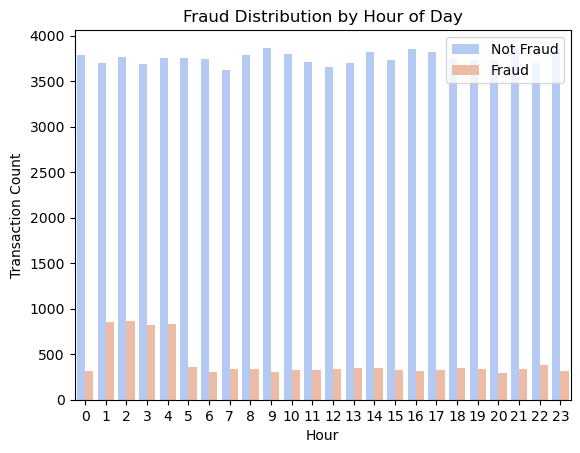

In [10]:
sns.countplot(data=df, x='txn_hour', hue='is_fraud', palette='coolwarm')
plt.title('Fraud Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


**Fraud by Device Type**

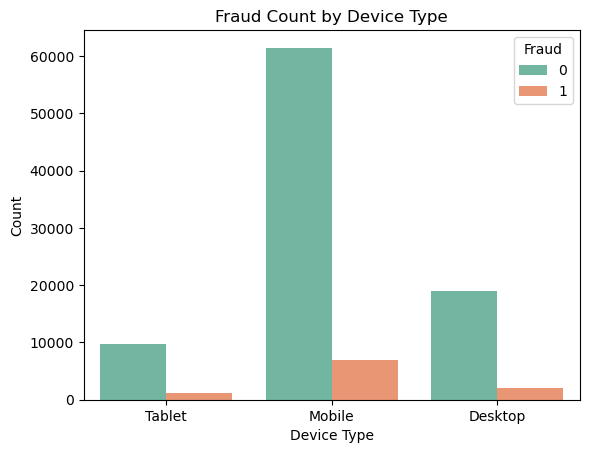

In [11]:
sns.countplot(data=df, x='device_type', hue='is_fraud', palette='Set2')
plt.title('Fraud Count by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()


**Fraud by New Location / Device**

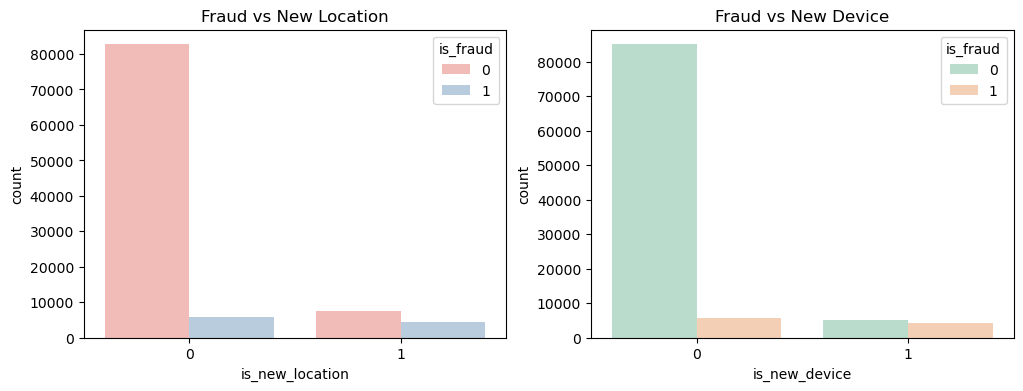

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='is_new_location', hue='is_fraud', ax=axs[0], palette='Pastel1')
axs[0].set_title('Fraud vs New Location')
sns.countplot(data=df, x='is_new_device', hue='is_fraud', ax=axs[1], palette='Pastel2')
axs[1].set_title('Fraud vs New Device')
plt.show()


**Correlation Heatmap**

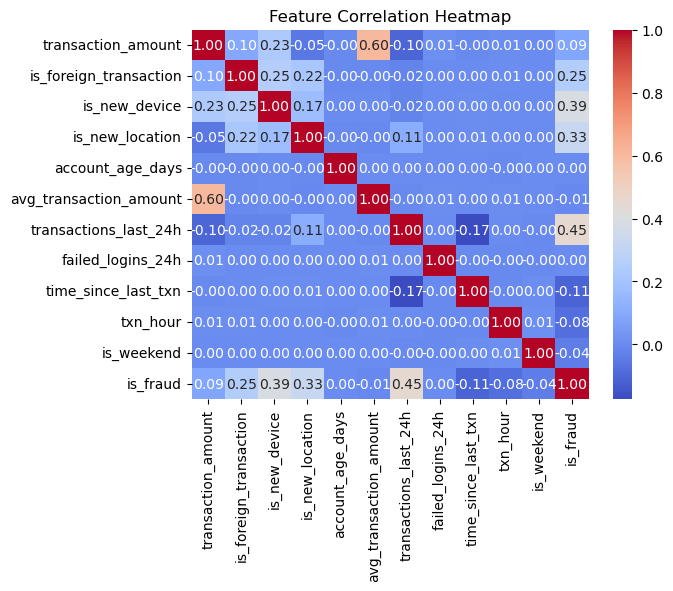

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# Data Preprocessing

In [14]:
df = df.drop(['transaction_id', 'user_id', 'transaction_time'], axis=1)

In [15]:
df.columns

Index(['transaction_amount', 'transaction_type', 'location',
       'is_foreign_transaction', 'device_type', 'is_new_device',
       'is_new_location', 'account_age_days', 'avg_transaction_amount',
       'transactions_last_24h', 'failed_logins_24h', 'time_since_last_txn',
       'txn_hour', 'is_weekend', 'is_fraud'],
      dtype='object')

In [16]:
df.shape

(100186, 15)

**Encoding categorical variables**

In [17]:
df = pd.get_dummies(df, columns=['transaction_type', 'device_type'], drop_first=True)


In [18]:
df.head(5)

,transaction_amount,location,is_foreign_transaction,is_new_device,is_new_location,account_age_days,avg_transaction_amount,transactions_last_24h,failed_logins_24h,time_since_last_txn,txn_hour,is_weekend,is_fraud,transaction_type_IMPS,transaction_type_NEFT,transaction_type_POS,transaction_type_RTGS,transaction_type_UPI,device_type_Mobile,device_type_Tablet
0,5068.33,Delhi,0,0,1,3124,4957.53,1,0,947,2,0,0,False,True,False,False,False,False,True
1,3428.09,Delhi,0,0,1,2302,3750.88,0,0,902,7,1,0,True,False,False,False,False,True,False
2,5161.81,Mumbai,0,0,0,1157,4075.63,5,0,893,16,1,0,False,True,False,False,False,True,False
3,4242.40,Chennai,0,0,0,613,3745.28,2,1,1139,1,0,0,False,False,False,False,True,False,True
4,1721.96,Hyderabad,0,0,0,637,2818.78,1,0,710,6,0,0,False,False,False,False,True,False,False


In [19]:
df.shape

(100186, 20)

**Encoding Loaction by using Fraud Rate**

In [20]:
location_fraud_rate = df.groupby('location')['is_fraud'].mean()
df['location_risk'] = df['location'].map(location_fraud_rate)

In [21]:
df['location_risk'] = df['location_risk'].fillna(location_fraud_rate.mean())

In [22]:
df = df.drop('location', axis=1)

**Standard Scale Numerical Columns**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
num_cols = ['transaction_amount', 'avg_transaction_amount', 'account_age_days',
            'transactions_last_24h', 'failed_logins_24h', 'time_since_last_txn',
            'location_risk']

In [25]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [26]:
df.head(30)

,transaction_amount,is_foreign_transaction,is_new_device,is_new_location,account_age_days,avg_transaction_amount,transactions_last_24h,failed_logins_24h,time_since_last_txn,txn_hour,is_weekend,is_fraud,transaction_type_IMPS,transaction_type_NEFT,transaction_type_POS,transaction_type_RTGS,transaction_type_UPI,device_type_Mobile,device_type_Tablet,location_risk
0,0.610742,0,0,1,1.238017,0.958082,-0.567651,-0.635946,0.570977,2,0,0,False,True,False,False,False,False,True,0.142157
1,-0.371562,0,0,1,0.437318,-0.248592,-0.985162,-0.635946,0.464542,7,1,0,True,False,False,False,False,True,False,0.142157
2,0.666725,0,0,0,-0.678012,0.076165,1.102389,-0.635946,0.443255,16,1,0,False,True,False,False,False,True,False,-1.497469
3,0.116111,0,0,0,-1.207915,-0.254192,-0.150141,0.944275,1.025100,1,0,0,False,False,False,False,True,False,True,1.165403
4,-1.393326,0,0,0,-1.184537,-1.180710,-0.567651,-0.635946,0.010418,6,0,0,False,False,False,False,True,False,False,1.284007
5,-0.020482,0,0,0,1.297436,0.989952,-0.985162,0.944275,-1.122525,12,0,0,False,False,False,False,True,True,False,1.165403
6,0.307859,1,0,0,0.683762,-0.050618,-0.567651,-0.635946,0.686873,6,1,0,False,False,False,False,True,True,False,1.284007
7,-0.331138,0,0,0,-0.513391,0.374080,-0.567651,-0.635946,1.734668,21,0,0,False,False,False,True,False,False,False,-1.497469
8,0.444523,0,1,1,-1.202070,-0.169420,-0.567651,-0.635946,0.653760,18,1,0,False,False,False,False,False,False,True,1.284007
9,-1.209884,1,1,1,0.465566,-1.000516,0.267369,-0.635946,-0.793759,17,0,1,False,True,False,False,False,False,False,1.284007


**Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x= df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)

In [32]:
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

# Model Building

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [34]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
rf_model.fit(x_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
y_pred_rf = rf_model.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]) 

In [37]:
print("Random Forest Evaluation:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC-AUC: {roc_rf:.4f}")

Random Forest Evaluation:

[[17820   214]
 [  405  1599]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18034
           1       0.88      0.80      0.84      2004

    accuracy                           0.97     20038
   macro avg       0.93      0.89      0.91     20038
weighted avg       0.97      0.97      0.97     20038

Accuracy: 0.9691
ROC-AUC: 0.9860


# XG boost Model

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

In [40]:
xgb_model.fit(x_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
y_pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

In [42]:
print("XGBoost Evaluation:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {acc_xgb:.4f}")
print(f"ROC-AUC: {roc_xgb:.4f}")

XGBoost Evaluation:

[[17843   191]
 [  419  1585]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18034
           1       0.89      0.79      0.84      2004

    accuracy                           0.97     20038
   macro avg       0.93      0.89      0.91     20038
weighted avg       0.97      0.97      0.97     20038

Accuracy: 0.9696
ROC-AUC: 0.9864


# Saving the Model

In [48]:
from sklearn.pipeline import Pipeline
import joblib 
from sklearn.compose import ColumnTransformer

In [49]:
numeric_features = ['transaction_amount', 'avg_transaction_amount', 'account_age_days',
    'transactions_last_24h', 'failed_logins_24h', 'time_since_last_txn',
    'location_risk', 'txn_hour']

In [56]:
binary_features = ['is_foreign_transaction', 'is_new_device', 'is_new_location']
all_features = numeric_features + binary_features

In [51]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), all_features)],remainder='passthrough')


In [57]:
pipeline = Pipeline([('preprocessing', preprocessor),('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))])

In [58]:
pipeline.fit(x_train_bal[all_features], y_train_bal)

C:\Users\shriy\anaconda3\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['transaction_amount',
                                                   'avg_transaction_amount',
                                                   'account_age_days',
                                                   'transactions_last_24h',
                                                   'failed_logins_24h',
                                                   'time_since_last_txn',
                                                   'location_risk',
                                                   'txn_hour'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [55]:
joblib.dump(pipeline, 'fraud_detection_rf_pipeline.pkl')
print("Updated model pipeline saved!")

Updated model pipeline saved!
